In [15]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df <-
  read_csv("data/tidy_ons_longcovid.csv",
          col_types = "ccfd")%>%
  filter(Domain == "Duration since first (suspected) coronavirus infection")%>%
  filter(Group != "Unknown duration")%>%
  select(-Domain, -filename, -`Lower 95% confidence limit`, , -`Upper 95% confidence limit`)%>%
  spread("Group", "Estimate", fill = 0)%>%
  gather("Group", "Estimate", -`Impact on daily activity`, -Date)%>%
  mutate(`Impact on daily activity` = as.factor(`Impact on daily activity`))%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))

df%>%
  head

Impact on daily activity,Date,Group,Estimate
<fct>,<date>,<chr>,<dbl>
Activity limited a little,2021-05-02,0 to <12 weeks,28
Activity limited a little,2021-06-06,0 to <12 weeks,8
Activity limited a little,2021-07-04,0 to <12 weeks,6
Activity limited a little,2021-08-01,0 to <12 weeks,26
Activity limited a little,2021-09-05,0 to <12 weeks,69
Activity limited a little,2021-10-02,0 to <12 weeks,97


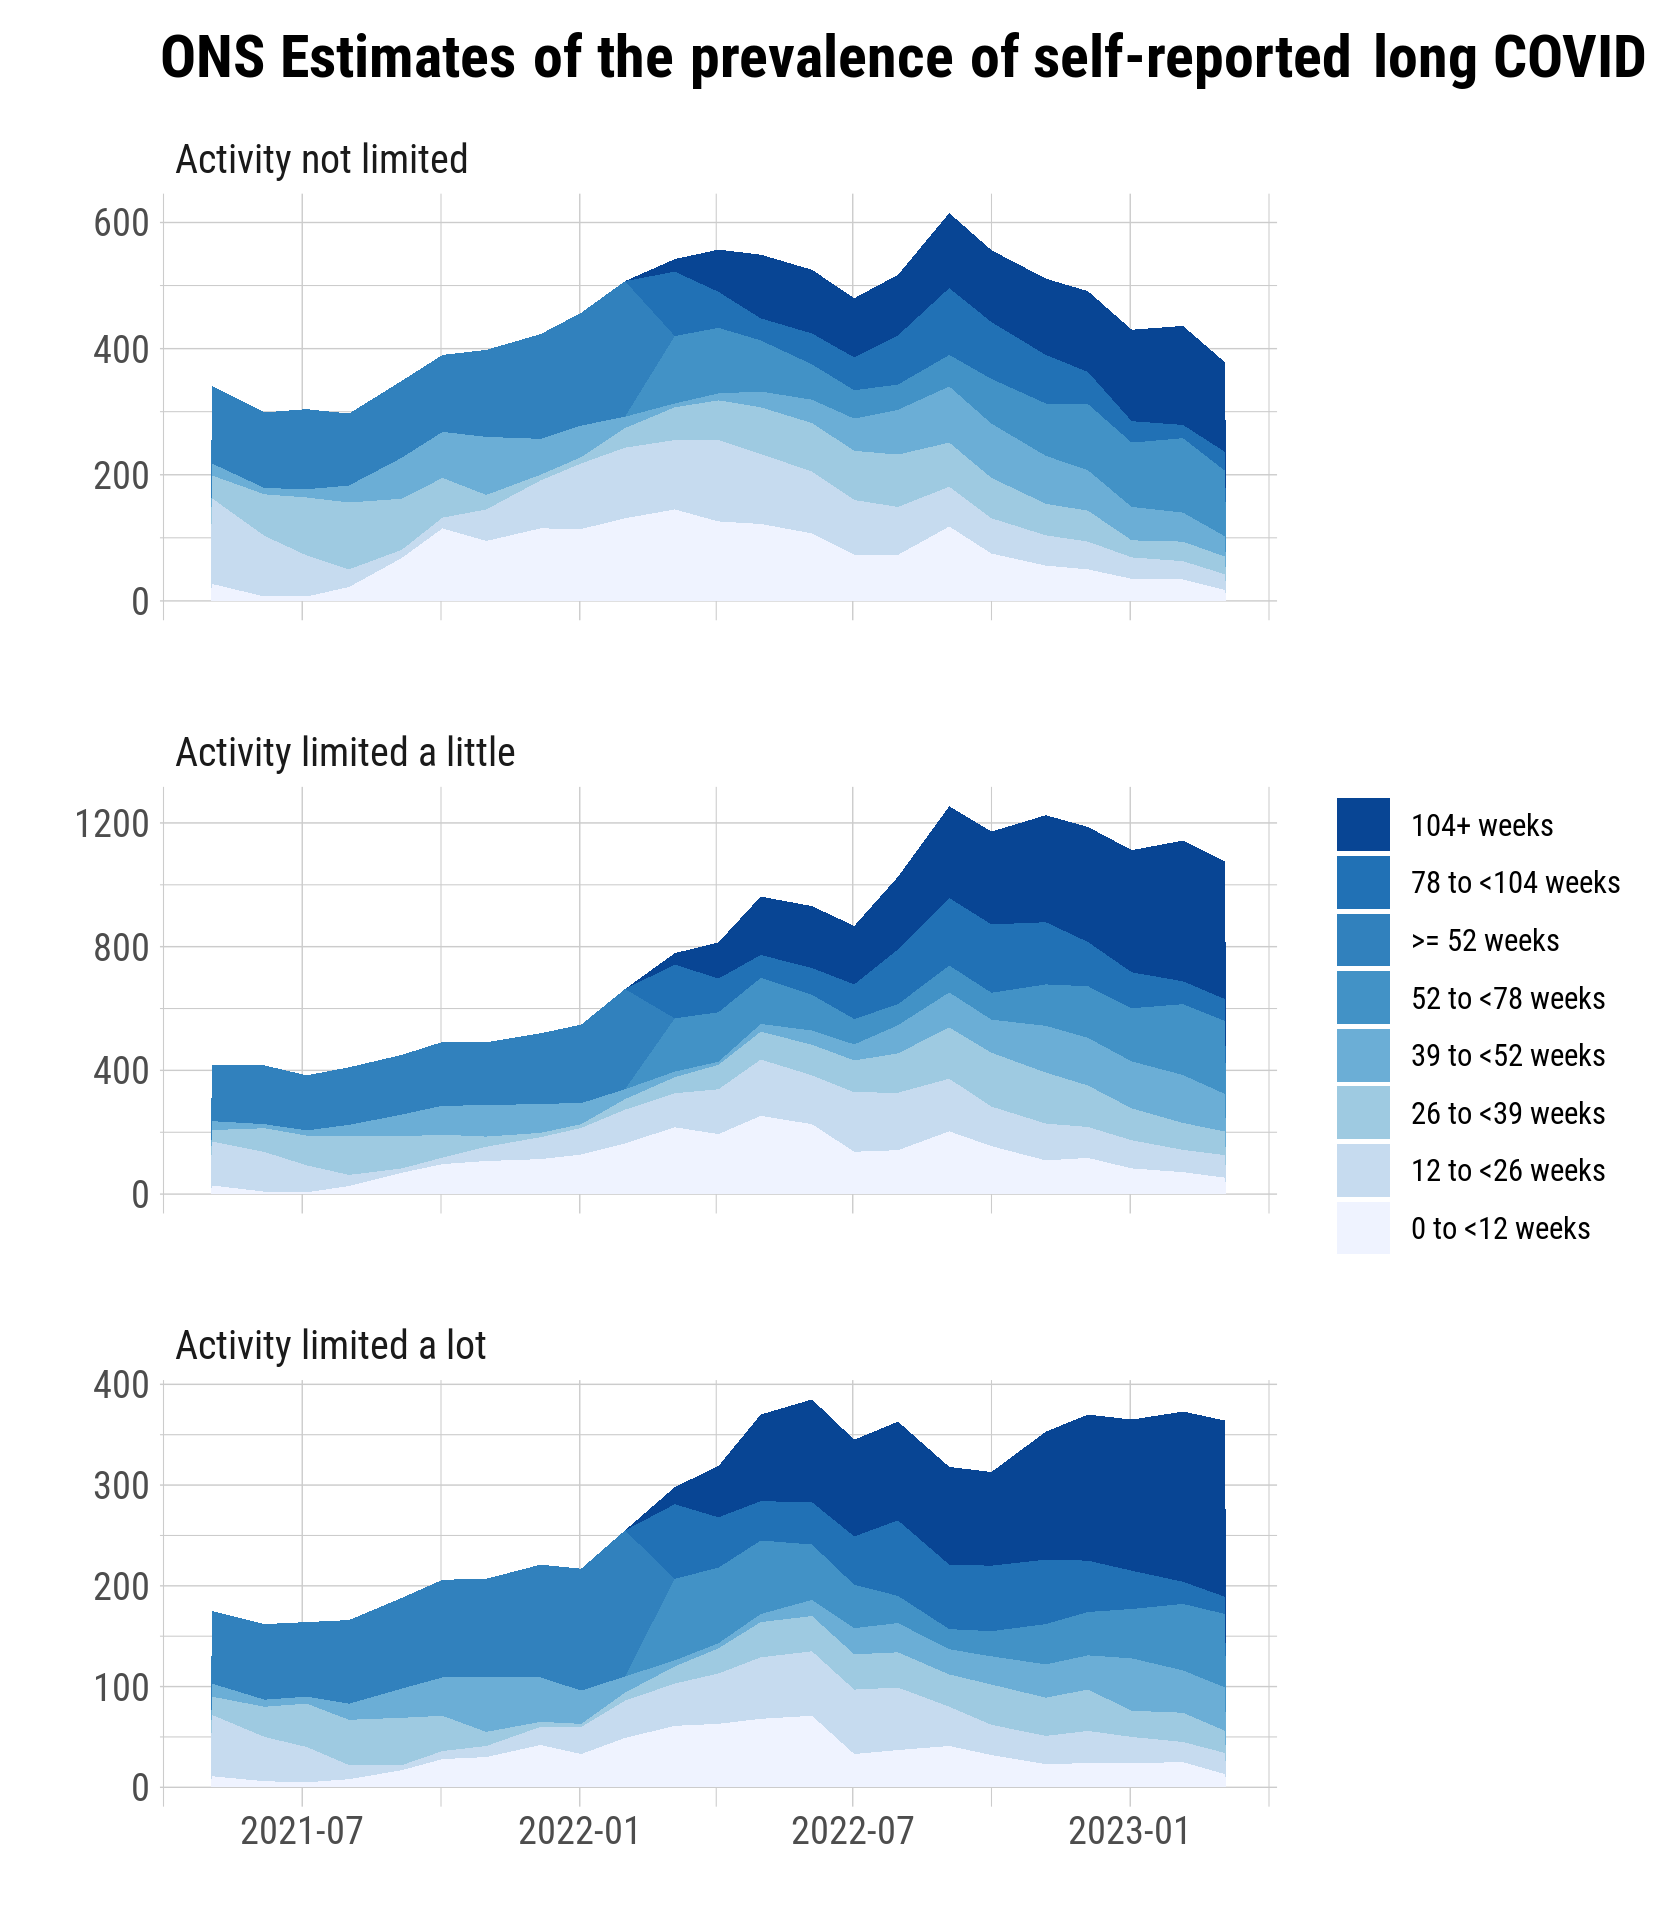

In [21]:
s = 1
options(repr.plot.width = s*7, repr.plot.height = s*8, repr.plot.res = 240/s)

df%>%
  ggplot(aes(x = Date, y = Estimate, fill = reorder(Group, -parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = rev(pal)) +
  facet_wrap(~`Impact on daily activity`, ncol = 1, scale = "free_y") +
  savePlot("ONS_LC_estimate1")

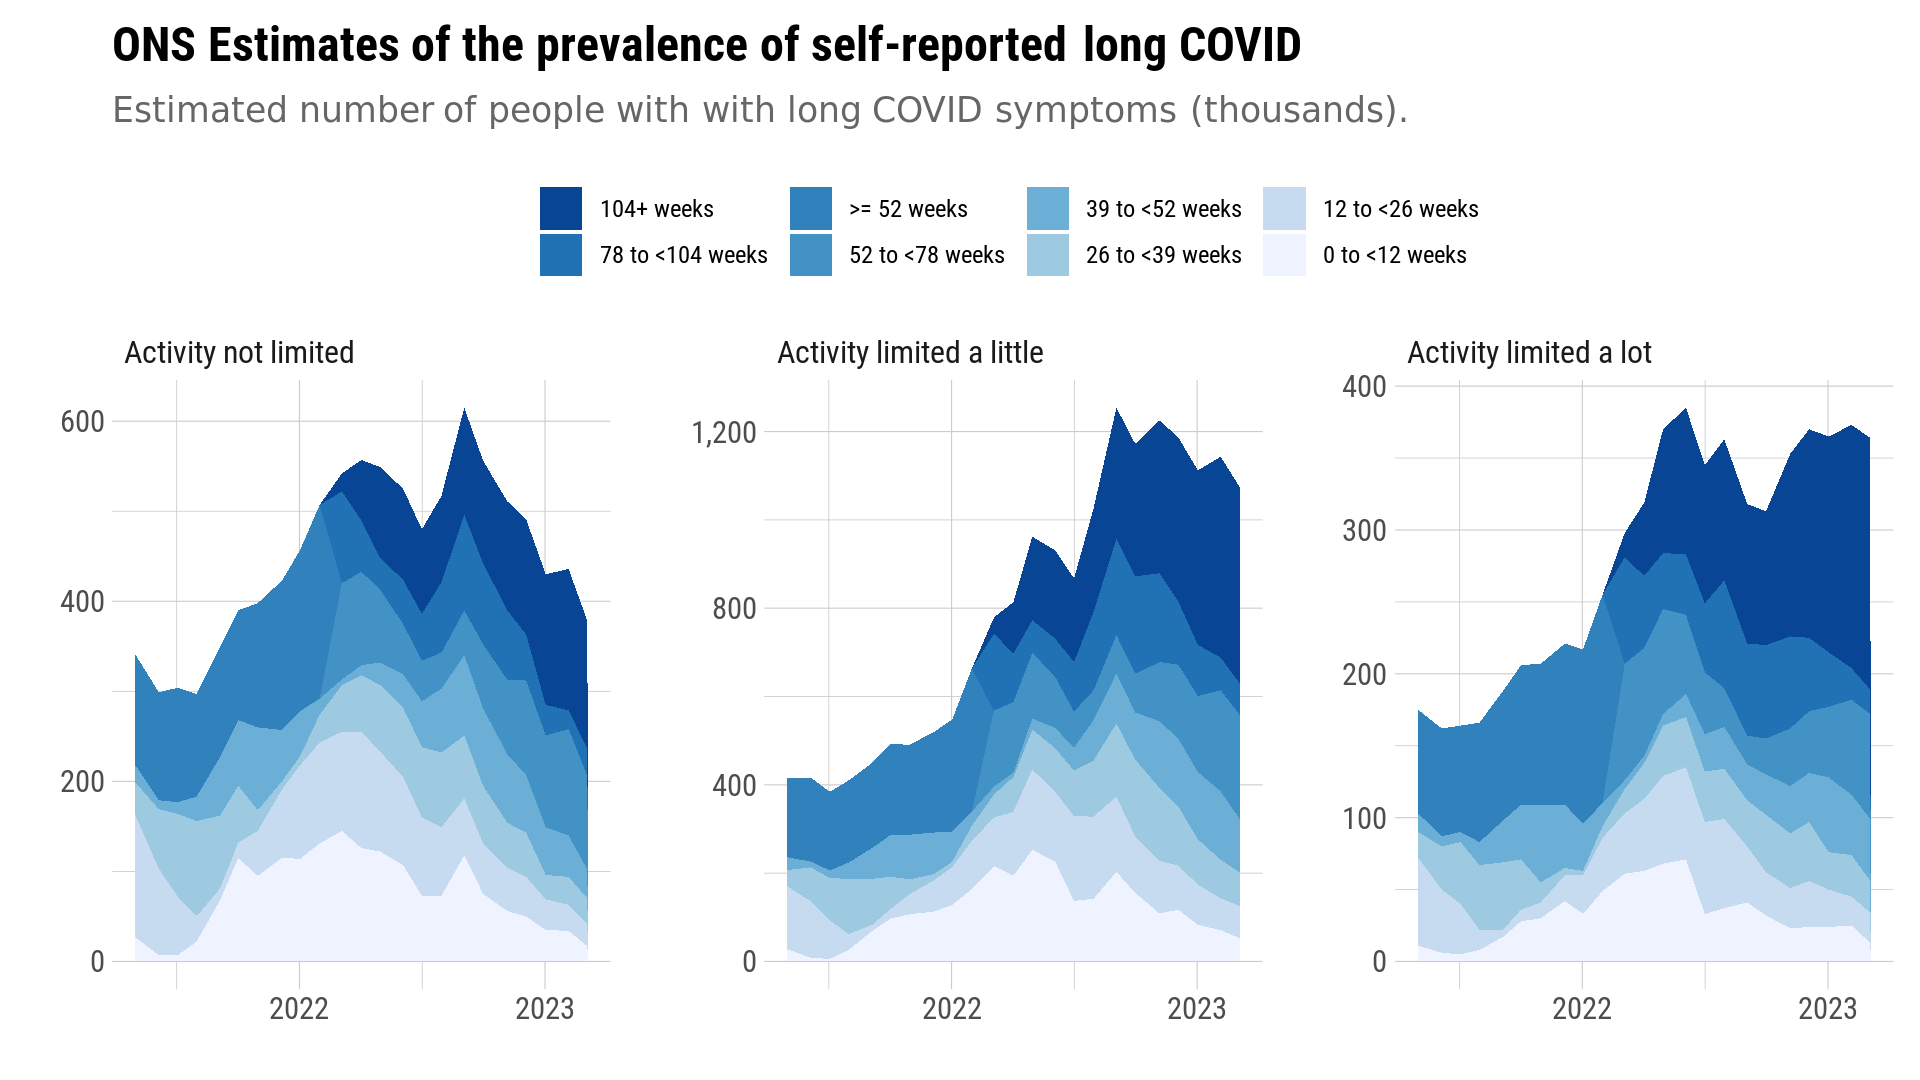

In [20]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  ggplot(aes(x = Date, y = Estimate, fill = reorder(Group, -parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms (thousands).",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = rev(pal)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 3, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_estimate2")

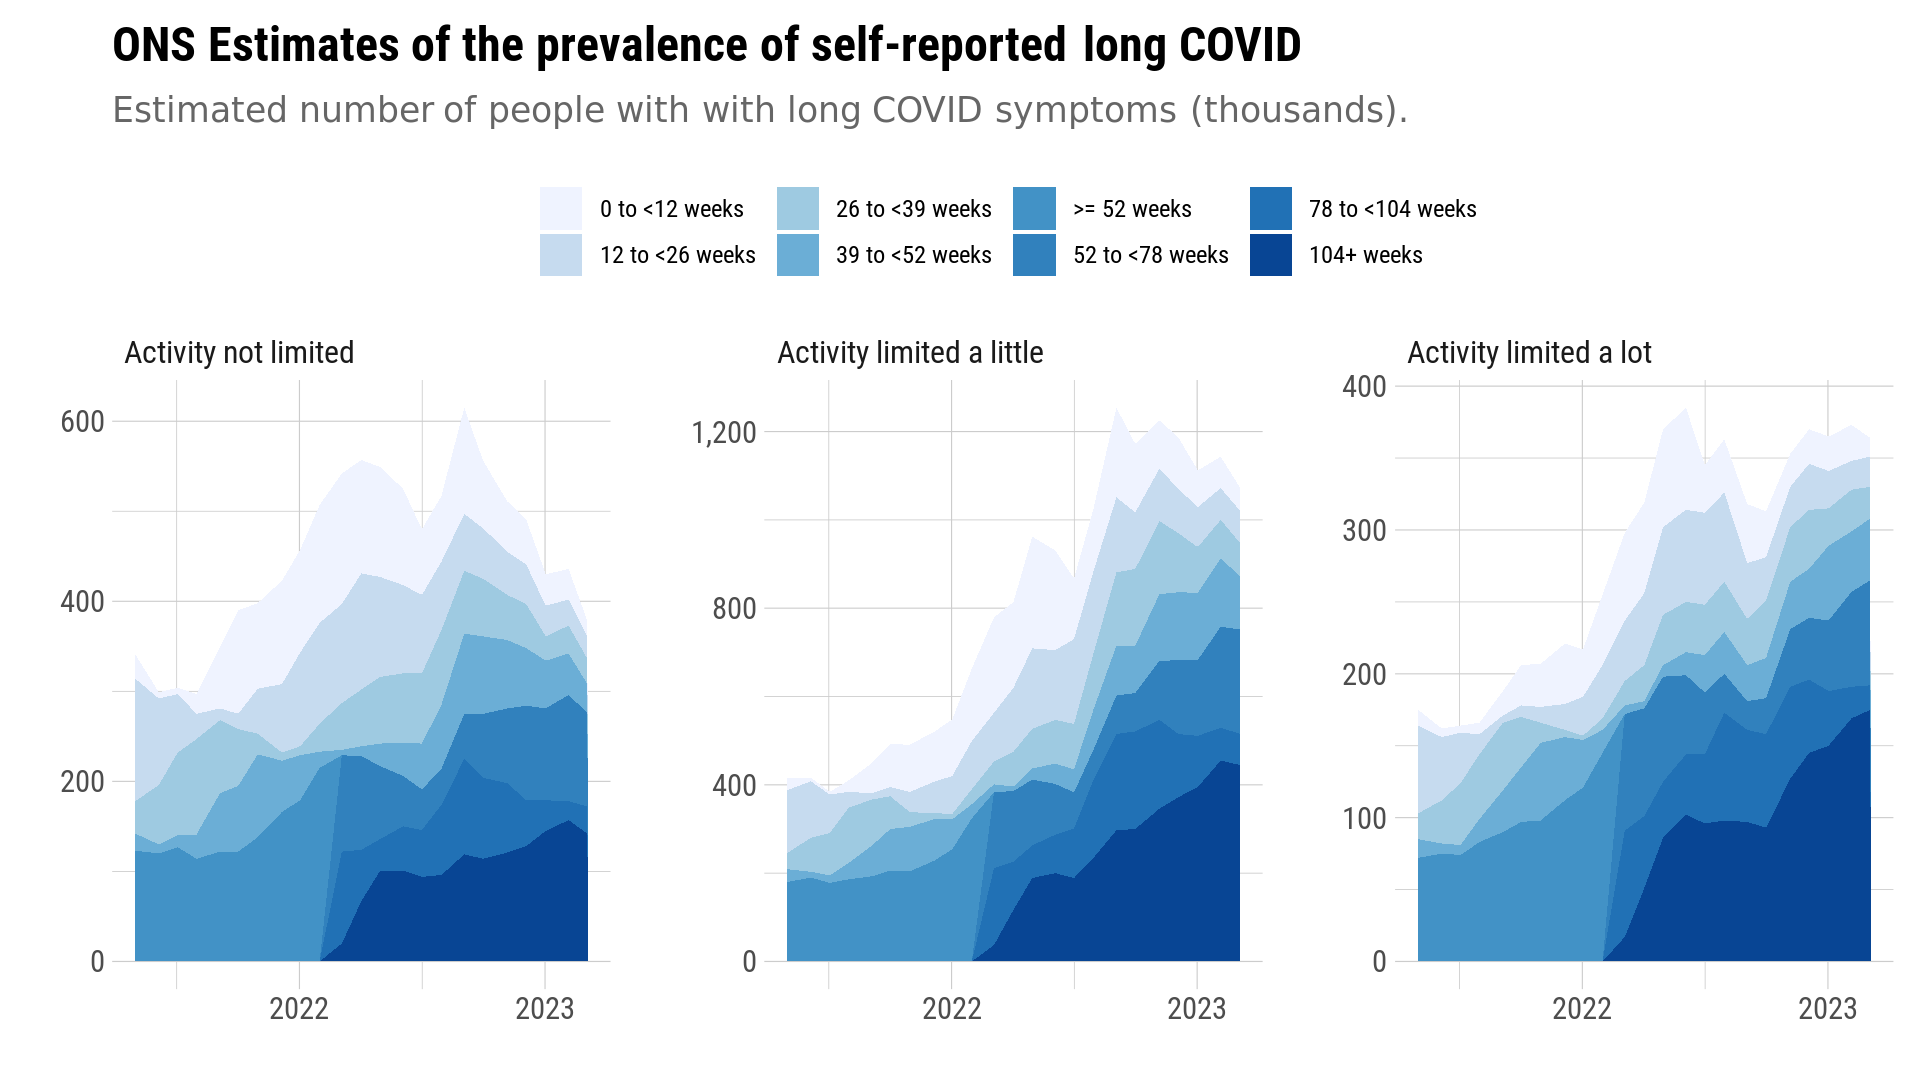

In [19]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df2%>%
  ggplot(aes(x = Date, y = Estimate, fill = reorder(Group, parse_number(Group)))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms (thousands).",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = pal) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 3, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_estimate3")